# Notebook GUI for annotating extracted cells

Extracted cells will be at:  /data02/AZC/AI_XRF/annotated_XRF/raw_cells
Please open directory for an xrf image and select any tif file from any channel.


<IPython.core.display.Javascript object>


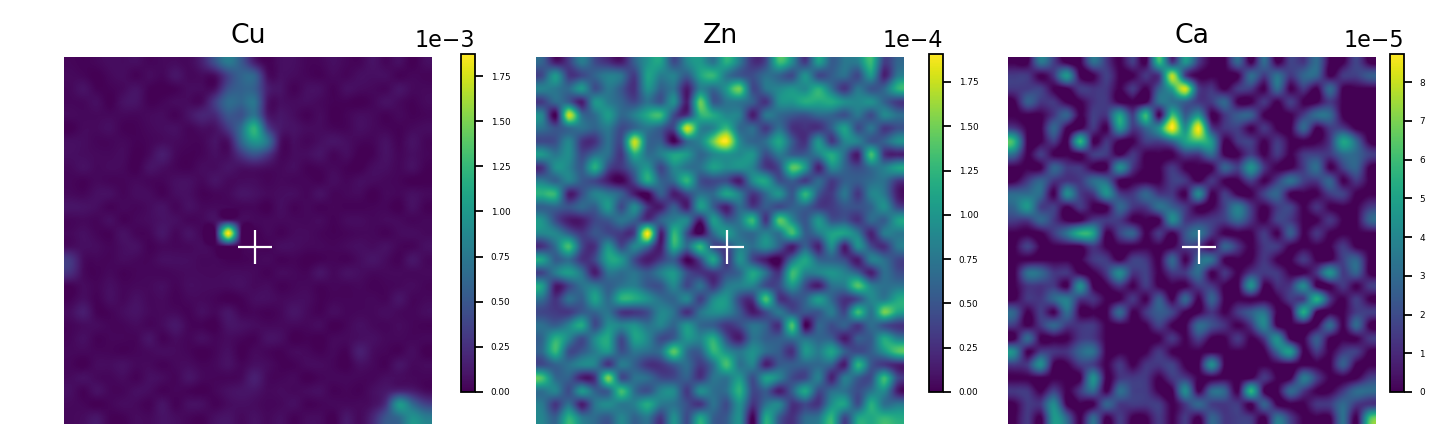

<IPython.core.display.Javascript object>


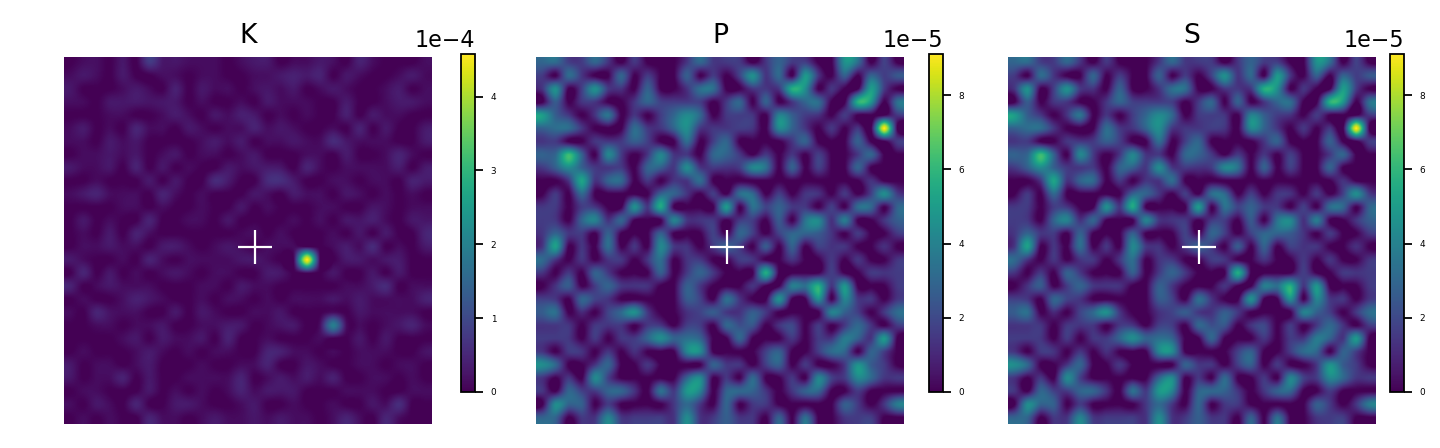

/home/otheruser/anaconda3/envs/tf2GPU/lib/python3.7/site-packages/ipykernel_launcher.py:355: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/otheruser/anaconda3/envs/tf2GPU/lib/python3.7/site-packages/ipykernel_launcher.py:356: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


In [1]:
import config

from config import *

%matplotlib notebook


def load_channels(obj):
    global base_xrf_img_dir, all_cells_Cu,all_cells_Zn,all_cells_Ca,all_cells_K,all_cells_P,all_cells_S
    base_xrf_img_dir=os.path.split(fc.selected_path)[0]
    w_bin_info.disabled=False
    w_status.disabled=False
    
    slider.disabled=False
#     print('XRF image at : ',base_xrf_img_dir)
    a_Cu=os.path.join(base_xrf_img_dir,'Cu') + '/*.tif'
    a_Zn=os.path.join(base_xrf_img_dir,'Zn') + '/*.tif'
    a_Ca=os.path.join(base_xrf_img_dir,'Ca') + '/*.tif'
    a_K=os.path.join(base_xrf_img_dir,'K') + '/*.tif'
    a_P=os.path.join(base_xrf_img_dir,'P') + '/*.tif'
    a_S=os.path.join(base_xrf_img_dir,'S') + '/*.tif'
#     print(a_Cu)

    

    all_cells_Cu=sorted(glob.glob(a_Cu)) 
    all_cells_Zn=sorted(glob.glob(a_Zn)) 
    all_cells_Ca=sorted(glob.glob(a_Ca)) 
    all_cells_K=sorted(glob.glob(a_K)) 
    all_cells_P=sorted(glob.glob(a_P)) 
    all_cells_S=sorted(glob.glob(a_S)) 
    
    w_status.value='Load cell images to view from :' + base_xrf_img_dir
    
    slider.max=len(all_cells_Cu)-1
    
def load_image(obj):
    global b_Cu, b_Zn, b_Ca, b_K, b_P, b_S
    global arr_Cu,arr_Zn,arr_Ca,arr_K,arr_P,arr_S
    idx=slider.value
    
    
    
    

    
    arr_Cu=np.array(all_cells_Cu)
    arr_Zn=np.array(all_cells_Zn)
    arr_Ca=np.array(all_cells_Ca)
    arr_K=np.array(all_cells_K)
    arr_P=np.array(all_cells_P)
    arr_S=np.array(all_cells_S)
    b_Cu=tiff.imread(arr_Cu[idx])
    b_Zn=tiff.imread(arr_Zn[idx])
    b_Ca=tiff.imread(arr_Ca[idx])
    b_K=tiff.imread(arr_K[idx])
    b_P=tiff.imread(arr_P[idx])
    b_S=tiff.imread(arr_S[idx])
    
    #Show info and status
    w_status.value='Use slider to select cells from the XRF image.\nUse buttons to accept or reject cells in bins. \n opened channel files' + '\n' + str(arr_Cu[idx]) + '\n' + str(arr_Zn[idx])  + '\n' + str(arr_Ca[idx]) + '\n' + str(arr_K[idx]) + '\n' + str(arr_P[idx]) + '\n' + str(arr_S[idx])
    xrf_file_key=os.path.split(arr_Cu[slider.value])[1].split('_')[0] + '_' +os.path.split(arr_Cu[slider.value])[1].split('_')[1] + '_' + os.path.split(arr_Cu[slider.value])[1].split('_')[2] + '_' + os.path.split(arr_Cu[slider.value])[1].split('_')[3]
    # shows the element and type of binary conversion

    w_bin_info.value='Key: '+ os.path.split(arr_Cu[slider.value])[1] + '\n' +'Bin. Elm.: '   + os.path.split(arr_Cu[slider.value])[1].split('_')[-2] + '\n' + 'Conv.: '+ os.path.split(arr_Cu[slider.value])[1].split('_')[-4] + '\n' + 'Total cell count = ' + str(len(all_cells_Cu)) 

    
    #turn on for debug
#     print('opened channel files')
#     print(arr_Cu[idx])
#     print(arr_Zn[idx])
#     print(arr_Ca[idx])
#     print(arr_K[idx])
#     print(arr_P[idx])
#     print(arr_S[idx])
    
    
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    ax_2[0].clear()
    ax_2[1].clear()
    ax_2[2].clear()
    
    img1=ax[0].imshow(b_Cu, interpolation='spline16');
    img2=ax[1].imshow(b_Zn, interpolation='spline16');
    img3=ax[2].imshow(b_Ca, interpolation='spline16');

    img4=ax_2[0].imshow(b_K, interpolation='spline16');
    img5=ax_2[1].imshow(b_P, interpolation='spline16');
    img6=ax_2[2].imshow(b_S, interpolation='spline16');
    
    
    
    fig.colorbar(img1, cax=cax1, orientation='vertical')
    fig.colorbar(img2, cax=cax2, orientation='vertical')
    fig.colorbar(img3, cax=cax3, orientation='vertical')
    
    
    fig_2.colorbar(img4, cax=cax1_2, orientation='vertical')
    fig_2.colorbar(img5, cax=cax2_2, orientation='vertical')
    fig_2.colorbar(img6, cax=cax3_2, orientation='vertical')
    
    fig.colorbar(img1, cax=cax1, orientation='vertical').ax.tick_params(labelsize=4)
    fig.colorbar(img2, cax=cax2, orientation='vertical').ax.tick_params(labelsize=4)
    fig.colorbar(img3, cax=cax3, orientation='vertical').ax.tick_params(labelsize=4)
    
    fig_2.colorbar(img4, cax=cax1_2, orientation='vertical').ax.tick_params(labelsize=4)
    fig_2.colorbar(img5, cax=cax2_2, orientation='vertical').ax.tick_params(labelsize=4)
    fig_2.colorbar(img6, cax=cax3_2, orientation='vertical').ax.tick_params(labelsize=4)
    
    
    fig.colorbar(img1, cax=cax1, orientation='vertical').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    fig.colorbar(img2, cax=cax2, orientation='vertical').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    fig.colorbar(img3, cax=cax3, orientation='vertical').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    
    fig_2.colorbar(img4, cax=cax1_2, orientation='vertical').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    fig_2.colorbar(img5, cax=cax2_2, orientation='vertical').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    fig_2.colorbar(img6, cax=cax3_2, orientation='vertical').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    
    
    ax[0].axis('off')
    ax[1].axis('off')
    ax[2].axis('off')
    
    ax_2[0].axis('off')
    ax_2[1].axis('off')
    ax_2[2].axis('off')
    
    ax[0].set_title('Cu')
    ax[1].set_title('Zn')
    ax[2].set_title('Ca')
    
    ax_2[0].set_title('K')
    ax_2[1].set_title('P')
    ax_2[2].set_title('S')
    
    
    
    fig.canvas.draw()
    fig_2.canvas.draw()


    fig.show()
    fig_2.show()
    
    
    #14 is the half of mini_patch_size
    ax[0].plot(14, 14, 'w+', markersize=CROSS_HAIR_SIZE)
    ax[1].plot(14, 14, 'w+', markersize=CROSS_HAIR_SIZE)
    ax[2].plot(14, 14, 'w+', markersize=CROSS_HAIR_SIZE)
    ax_2[0].plot(14, 14, 'w+', markersize=CROSS_HAIR_SIZE)
    ax_2[1].plot(14, 14, 'w+', markersize=CROSS_HAIR_SIZE)
    ax_2[2].plot(14, 14, 'w+', markersize=CROSS_HAIR_SIZE)
    
    return
    
def accept(obj):
    #accept codeblock
    accept_path=os.path.join(os.path.join(os.path.split(os.path.split(os.path.split(os.path.split(arr_Cu[slider.value])[0])[0])[0])[0], "accept"))
    xrf_image_tag=os.path.split(os.path.split(os.path.split(arr_Cu[slider.value])[0])[0])[1] 
    xrf_image_accepted_dir=os.path.join(accept_path,xrf_image_tag)
    

    is_xrf_image_accept_Exist = os.path.exists(xrf_image_accepted_dir)

    if not is_xrf_image_accept_Exist:
#         print('accepted, ' + xrf_image_tag + ' directory created')
        w_status.value='accepted, ' + xrf_image_tag + ' directory created'
        os.mkdir(xrf_image_accepted_dir)
    else:
#         print('accepted, ' + xrf_image_tag + ' directory exists!')
        w_status.value='accepted, ' + xrf_image_tag + ' directory exists!'



    is_accept_Cu_Exist = os.path.exists(os.path.join(xrf_image_accepted_dir,'Cu'))  
    is_accept_Zn_Exist = os.path.exists(os.path.join(xrf_image_accepted_dir,'Zn'))  
    is_accept_Ca_Exist = os.path.exists(os.path.join(xrf_image_accepted_dir,'Ca'))  
    is_accept_K_Exist = os.path.exists(os.path.join(xrf_image_accepted_dir,'K'))  
    is_accept_P_Exist = os.path.exists(os.path.join(xrf_image_accepted_dir,'P'))  
    is_accept_S_Exist = os.path.exists(os.path.join(xrf_image_accepted_dir,'S'))  


    if not is_accept_Cu_Exist:
        os.mkdir(os.path.join(xrf_image_accepted_dir,'Cu'))
    if not is_accept_Zn_Exist:
        os.mkdir(os.path.join(xrf_image_accepted_dir,'Zn'))
    if not is_accept_Ca_Exist:
        os.mkdir(os.path.join(xrf_image_accepted_dir,'Ca'))
    if not is_accept_K_Exist:
        os.mkdir(os.path.join(xrf_image_accepted_dir,'K'))
    if not is_accept_P_Exist:
        os.mkdir(os.path.join(xrf_image_accepted_dir,'P'))
    if not is_accept_S_Exist:
        os.mkdir(os.path.join(xrf_image_accepted_dir,'S'))


    copy(arr_Cu[slider.value], os.path.join(os.path.join(xrf_image_accepted_dir, 'Cu'),os.path.split(arr_Cu[slider.value])[1]) ); # savepath Cu channel

    copy(arr_Zn[slider.value], os.path.join(os.path.join(xrf_image_accepted_dir, 'Zn'),os.path.split(arr_Zn[slider.value])[1]) ); # savepath Zn channel


    copy(arr_Ca[slider.value], os.path.join(os.path.join(xrf_image_accepted_dir, 'Ca'),os.path.split(arr_Ca[slider.value])[1]) ); # savepath Ca channel

    copy(arr_K[slider.value], os.path.join(os.path.join(xrf_image_accepted_dir, 'K'),os.path.split(arr_K[slider.value])[1]) ); # savepath K channel


    copy(arr_P[slider.value], os.path.join(os.path.join(xrf_image_accepted_dir, 'P'),os.path.split(arr_P[slider.value])[1]) ); # savepath P channel

    copy(arr_S[slider.value], os.path.join(os.path.join(xrf_image_accepted_dir, 'S'),os.path.split(arr_S[slider.value])[1]) ); # savepath S channel    

    
def reject(obj):
    #reject codeblock
    reject_path=os.path.join(os.path.join(os.path.split(os.path.split(os.path.split(os.path.split(arr_Cu[slider.value])[0])[0])[0])[0], "reject"))
    xrf_image_tag=os.path.split(os.path.split(os.path.split(arr_Cu[slider.value])[0])[0])[1] 
    xrf_image_rejected_dir=os.path.join(reject_path,xrf_image_tag)


    is_xrf_image_reject_Exist = os.path.exists(xrf_image_rejected_dir)

    if not is_xrf_image_reject_Exist:
#         print('rejected, ' + xrf_image_tag + ' directory created')
        w_status.value='rejected, ' + xrf_image_tag + ' directory created'
        os.mkdir(xrf_image_rejected_dir)
    else:
#         print('rejected, ' + xrf_image_tag + ' directory exists!')
        w_status.value='rejected, ' + xrf_image_tag + ' directory exists!'



    is_reject_Cu_Exist = os.path.exists(os.path.join(xrf_image_rejected_dir,'Cu'))  
    is_reject_Zn_Exist = os.path.exists(os.path.join(xrf_image_rejected_dir,'Zn'))  
    is_reject_Ca_Exist = os.path.exists(os.path.join(xrf_image_rejected_dir,'Ca'))  
    is_reject_K_Exist = os.path.exists(os.path.join(xrf_image_rejected_dir,'K'))  
    is_reject_P_Exist = os.path.exists(os.path.join(xrf_image_rejected_dir,'P'))  
    is_reject_S_Exist = os.path.exists(os.path.join(xrf_image_rejected_dir,'S'))  


    if not is_reject_Cu_Exist:
        os.mkdir(os.path.join(xrf_image_rejected_dir,'Cu'))
    if not is_reject_Zn_Exist:
        os.mkdir(os.path.join(xrf_image_rejected_dir,'Zn'))
    if not is_reject_Ca_Exist:
        os.mkdir(os.path.join(xrf_image_rejected_dir,'Ca'))
    if not is_reject_K_Exist:
        os.mkdir(os.path.join(xrf_image_rejected_dir,'K'))
    if not is_reject_P_Exist:
        os.mkdir(os.path.join(xrf_image_rejected_dir,'P'))
    if not is_reject_S_Exist:
        os.mkdir(os.path.join(xrf_image_rejected_dir,'S'))


    copy(arr_Cu[slider.value], os.path.join(os.path.join(xrf_image_rejected_dir, 'Cu'),os.path.split(arr_Cu[slider.value])[1])); # savepath Cu channel

    copy(arr_Zn[slider.value], os.path.join(os.path.join(xrf_image_rejected_dir, 'Zn'),os.path.split(arr_Zn[slider.value])[1])); # savepath Zn channel


    copy(arr_Ca[slider.value], os.path.join(os.path.join(xrf_image_rejected_dir, 'Ca'),os.path.split(arr_Ca[slider.value])[1])); # savepath Ca channel

    copy(arr_K[slider.value], os.path.join(os.path.join(xrf_image_rejected_dir, 'K'),os.path.split(arr_K[slider.value])[1]) ); # savepath K channel


    copy(arr_P[slider.value], os.path.join(os.path.join(xrf_image_rejected_dir, 'P'),os.path.split(arr_P[slider.value])[1]) ); # savepath P channel

    copy(arr_S[slider.value], os.path.join(os.path.join(xrf_image_rejected_dir, 'S'),os.path.split(arr_S[slider.value])[1]) ); # savepath S channel        
    
    
# annot_dir='annotated_XRF'
base__dir_path=os.path.join(os.path.join(os.path.dirname(os.getcwd()),annot_dir), 'raw_cells')
print("Extracted cells will be at: ", base__dir_path)  
print('Please open directory for an xrf image and select any tif file from any channel.')
    
tiff_dir = base__dir_path
default_path = tiff_dir 
fc = FileChooser(default_path)
fc.default_filename = '.tif'
w_bin_info = widgets.Textarea(description='Info.:', 
                             value='File information' ,  
#                              style={'description_width': 'initial'},
                             layout=widgets.Layout(height="auto", width="auto"),
                             disabled=True)

w_status = widgets.Textarea(description='Status:', 
                             value='Status pane' ,  
#                              style={'description_width': 'initial'},
                             layout=widgets.Layout(height="auto", width="auto"),
                             disabled=True)

btn_fc = widgets.Button(description = "Load Channels")


btn_load_img = widgets.Button(description = "Load cell images")
btn_accept = widgets.Button(description = "Accept", disabled=False)
btn_reject = widgets.Button(description = "Reject", disabled=False)

slider = widgets.IntSlider(min=1, max=100, step=1, continuous_update=True, disabled=True)




display(HBox(children = [btn_fc, fc]))
display(HBox(children = [w_bin_info,w_status]))
display(HBox(children = [slider]))
display(HBox(children = [btn_load_img, btn_accept, btn_reject]))

global fig, ax,fig_2, ax_2
global img1,img2,img3,img4,img5,img6
fig, ax = plt.subplots(1,3, figsize = (9,2.8))
fig_2, ax_2 = plt.subplots(1,3, figsize = (9,2.8))


#play with the horizontal value to position the colorbars properly
cax1 = fig.add_axes([0.32, 0.125, 0.01, 0.755])
cax2 = fig.add_axes([0.645, 0.125, 0.01, 0.755])
cax3 = fig.add_axes([0.965, 0.125, 0.01, 0.755])

cax1_2 = fig_2.add_axes([0.32, 0.125, 0.01, 0.755])
cax2_2 = fig_2.add_axes([0.645, 0.125, 0.01, 0.755])
cax3_2 = fig_2.add_axes([0.965, 0.125, 0.01, 0.755])

# Turn on the axis value for debugging




cax1.axis('on')
cax2.axis('on')
cax3.axis('on')

cax1_2.axis('on')
cax2_2.axis('on')
cax3_2.axis('on')


ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

ax_2[0].axis('off')
ax_2[1].axis('off')
ax_2[2].axis('off')

ax[0].set_title('Cu')
ax[1].set_title('Zn')
ax[2].set_title('Ca')

ax_2[0].set_title('K')
ax_2[1].set_title('P')
ax_2[2].set_title('S')



fig.tight_layout()
fig_2.tight_layout()

btn_fc.on_click(load_channels)
btn_load_img.on_click(load_image)
btn_accept.on_click(accept)
btn_reject.on_click(reject)

In [23]:
#end!